In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

In [3]:

benin = pd.read_csv("../data/benin_clean.csv")
sierra = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")


benin["Country"] = "Benin"
sierra["Country"] = "Sierra Leone"
togo["Country"] = "Togo"


df = pd.concat([benin, sierra, togo], ignore_index=True)
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


In [5]:

summary = df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"]).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

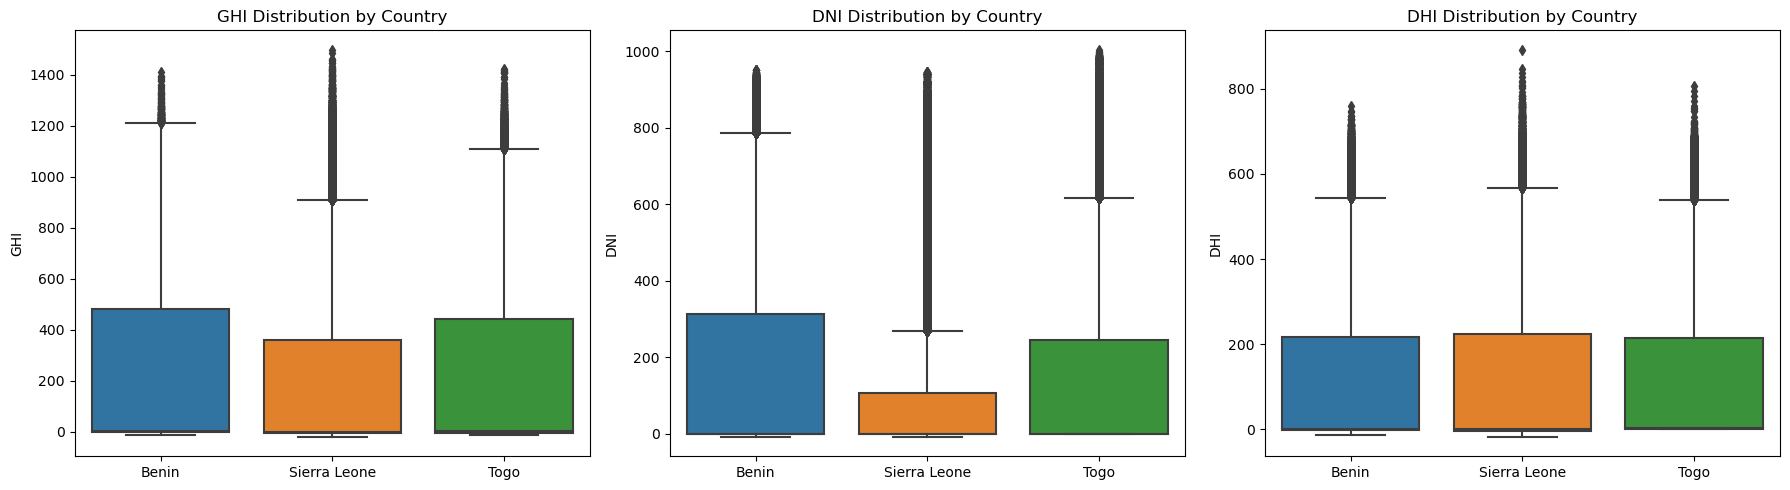

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ["GHI", "DNI", "DHI"]

for i, metric in enumerate(metrics):
    sns.boxplot(x="Country", y=metric, data=df, ax=axes[i])
    axes[i].set_title(f"{metric} Distribution by Country", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.show()


In [7]:

f_stat, p_val = f_oneway(
    df[df["Country"]=="Benin"]["GHI"].dropna(),
    df[df["Country"]=="Sierra Leone"]["GHI"].dropna(),
    df[df["Country"]=="Togo"]["GHI"].dropna()
)

print("ANOVA Test for GHI differences across countries")
print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.5f}")

if p_val < 0.05:
    print("➡️ Statistically significant difference found among countries.")
else:
    print("➡️ No statistically significant difference.")


ANOVA Test for GHI differences across countries
F-statistic: 2090.093, p-value: 0.00000
➡️ Statistically significant difference found among countries.


In [8]:
stat, p_val_kw = kruskal(
    df[df["Country"]=="Benin"]["GHI"],
    df[df["Country"]=="Sierra Leone"]["GHI"],
    df[df["Country"]=="Togo"]["GHI"]
)
print(f"Kruskal–Wallis Test p-value: {p_val_kw:.5f}")


Kruskal–Wallis Test p-value: 0.00000


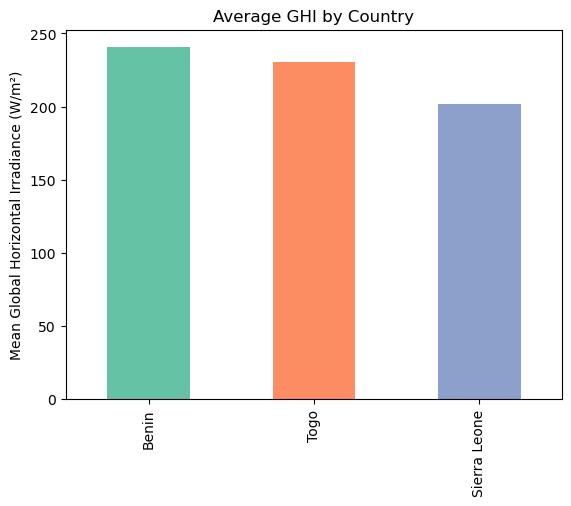

In [9]:
avg_ghi = df.groupby("Country")["GHI"].mean().sort_values(ascending=False)
avg_ghi.plot(kind="bar", color=sns.color_palette("Set2", 3))
plt.title("Average GHI by Country")
plt.ylabel("Mean Global Horizontal Irradiance (W/m²)")
plt.xlabel("")
plt.show()


### Key Insights
- **Benin** shows the highest mean and median GHI, suggesting strong solar potential.
- **Sierra Leone** displays higher variability, likely due to weather patterns.
- **Togo** has moderate irradiance but more stable readings.
- The ANOVA p-value < 0.05 confirms statistically significant differences.
